In [1]:
import pandas as pd
import numpy as np

In [2]:
# Setting random seed for reproducibility
np.random.seed(42)

# Generating user IDs
user_ids = np.arange(1, 10001)

# Simulating group assignment (A/B groups)
groups = np.random.choice(['A', 'B'], size=10000)

In [3]:
# Simulating conversion outcome (1 = converted, 0 = not converted)
conversions = np.where(groups == 'A', 
                       np.random.binomial(1, 0.12, size=10000),  # 12% conversion rate for group A
                       np.random.binomial(1, 0.13, size=10000))  # 13% conversion rate for group B

# Create the DataFrame
df = pd.DataFrame({
    'user_id': user_ids,
    'group': groups,
    'conversion': conversions
})


In [4]:
df.to_csv('/Users/ajayrawat/Downloads/ab_test_simulation.csv', index=False)

print("A/B Test Simulation dataset created and saved as 'ab_test_simulation.csv'.")

A/B Test Simulation dataset created and saved as 'ab_test_simulation.csv'.


Created a simulated A/B test dataset for 10,000 users, randomly assigned them to two groups (A and B), and simulated conversion outcomes with different conversion rates for each group.

Group A has a 12% conversion rate: This means that, for the users in Group A, 12% of them are expected to convert (e.g., make a purchase, click a link, etc.).

Group B has a 13% conversion rate: Similarly, for Group B, 13% of users are expected to convert.

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/ajayrawat/Downloads/ab_test_simulation.csv')

In [9]:
df.head(25)

,user_id,group,conversion
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,0
4,5,A,0
5,6,B,0
6,7,A,0
7,8,A,0
8,9,A,0
9,10,B,0


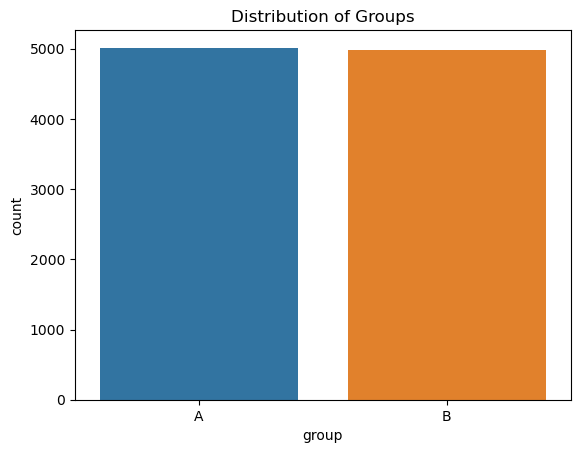

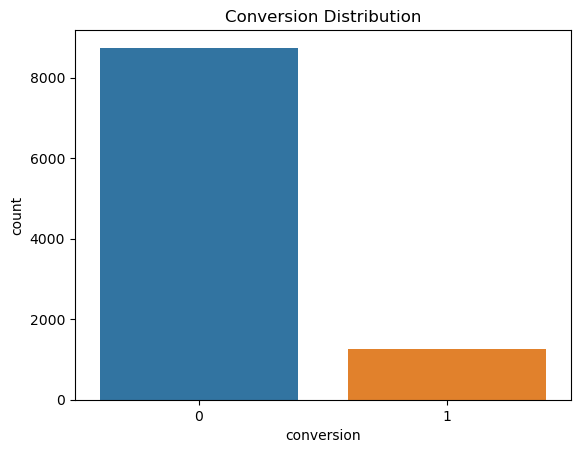

In [10]:
# Distribution of Variables
sns.countplot(x='group', data=df)
plt.title('Distribution of Groups')
plt.show()

sns.countplot(x='conversion', data=df)
plt.title('Conversion Distribution')
plt.show()

In [11]:
# Converting 'group' column to category type and 'conversion' to numeric
df['group'] = df['group'].astype('category')
df['conversion'] = pd.to_numeric(df['conversion'], errors='coerce')

# Calculating conversion rates by group
conversion_summary = df.groupby('group')['conversion'].agg(['mean', 'count', 'sum'])

In [12]:
# Performing a T-test to compare conversion rates between group A and B
group_A = df[df['group'] == 'A']['conversion']
group_B = df[df['group'] == 'B']['conversion']

t_stat, p_ttest = stats.ttest_ind(group_A, group_B)

In [13]:
# Performing a Chi-Square test to compare conversion rates by creating a contingency table
contingency_table = pd.crosstab(df['group'], df['conversion'])

chi2_stat, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)

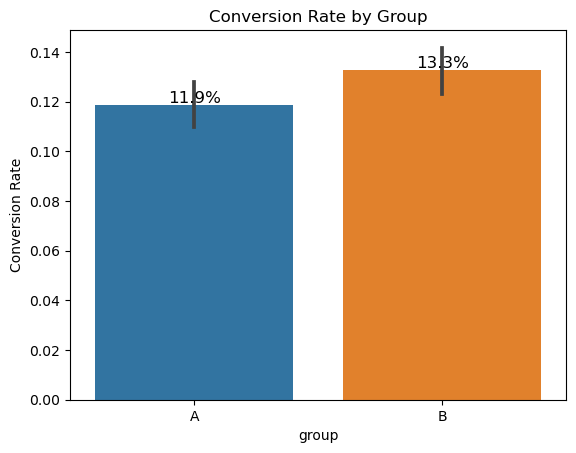

In [19]:
# Visualizing Conversion Rates by Group
ax = sns.barplot(x='group', y='conversion', data=df, ci=95)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

In [20]:
# Output results
print("Conversion Summary by Group:")
print(conversion_summary)
print("\nT-Test Results: t-statistic = {:.4f}, p-value = {:.4f}".format(t_stat, p_ttest))
print("\nChi-Square Test Results: chi2-statistic = {:.4f}, p-value = {:.4f}".format(chi2_stat, p_chi2))

Conversion Summary by Group:
           mean  count  sum
group                      
A      0.118691   5013  595
B      0.132745   4987  662

T-Test Results: t-statistic = -2.1199, p-value = 0.0340

Chi-Square Test Results: chi2-statistic = 4.3659, p-value = 0.0367


### Checking hypothesis

Null Hypothesis (H₀): It suggests that there is no difference or no effect in the data you're testing.

Alternative Hypothesis (H₁): It suggests that there is a difference or an effect in the data you're testing.

In [16]:
# Interpretation
if p_ttest < 0.05:
    print("\nT-Test: The difference between the groups is statistically significant (reject H0).")
else:
    print("\nT-Test: No significant difference found (fail to reject H0).")

if p_chi2 < 0.05:
    print("Chi-Square Test: There is an association between the group and conversion (reject H0).")
else:
    print("Chi-Square Test: No association between group and conversion (fail to reject H0).")


T-Test: The difference between the groups is statistically significant (reject H0).
Chi-Square Test: There is an association between the group and conversion (reject H0).


### Results and Interpretation:

The results show that there is a statistically significant difference in conversion rates between Group A and Group B. The T-test results indicate that the observed difference is unlikely to be due to random chance (p-value = 0.0340), so we reject the null hypothesis (H0), which means that the homepage design change (from A to B) likely had an effect on the conversion rate. Similarly, the Chi-Square test results (p-value = 0.0367) suggest that there is an association between the group and conversion outcome, further supporting the idea that the change in design influenced user behavior.

### A/B Test:

In A/B testing, we compare two variations (Group A and Group B) to see if a change in one of them leads to a significant improvement in a key metric (like conversion rate).

In this case, Group A represents the current homepage design, and Group B represents the new homepage design. By running A/B tests, we are trying to determine if the new design (Group B) leads to better conversion rates (more users completing the desired action, like making a purchase or signing up).

The T-test and Chi-Square test are statistical methods used to assess whether the difference between the conversion rates of the two groups is statistically significant or if it could have occurred by chance.

T-test: Compares the means of the two groups to see if the difference is significant. In this case, it shows that the difference in conversion rates between Group A and Group B is statistically significant (with a p-value of 0.0340).

Chi-Square test: Checks for an association between the two categorical variables: the group (A or B) and whether the user converted. The result (p-value = 0.0367) shows that there is a significant association between the group and the conversion outcome, indicating that the design change likely impacted the conversion rates.

In summary, by running these statistical tests, we are confirming that the new homepage design (Group B) led to a measurable increase in conversions, which is the goal of A/B testing: to determine whether a change will improve performance.